# *** Sentiment Analysis of Tweets: Understanding Public Opinion on Social Media ***

___
### Dataset Introduction

This dataset contains tweets related to various topics or entities, along with sentiment analysis. The data is collected from Twitter and focuses on capturing user opinions and experiences shared via tweets. The tweets are categorized by sentiment, and each entry includes information about the entity being discussed. This type of dataset can be useful for analyzing public perception, tracking brand reputation, and identifying key topics or trends.
___

___
#### ** Columns in the Dataset **

    Tweet ID:
        Description: A unique identifier assigned to each tweet. This ID is essential for referencing individual tweets within the dataset and for linking them to other relevant data if needed (e.g., replies, retweets).
        Example: 1234567890

    Sentiment:
        Description: The sentiment classification of the tweet, which can typically be Positive, Negative, or Neutral. This sentiment is usually determined through natural language processing (NLP) techniques to understand the general emotion conveyed in the tweet.
        Example: Positive

    Entity:
        Description: The entity or brand being discussed in the tweet. This could refer to a company, product, or any other notable subject being mentioned or referenced. For example, the entity might be "Borderlands" or "Madden NFL" if the tweet is discussing a specific video game.
        Example: Borderlands 3

    Tweet Text:
        Description: The full text of the tweet, which contains the user's opinion, feedback, or statement. This column allows us to perform detailed analysis, such as extracting specific keywords or phrases associated with particular sentiments or entities.
        Example: "I love playing #Borderlands3! It's so much fun!"
___

### Step-1 : Import necessary libraries

In [206]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import re  # For regular expressions to clean text
import matplotlib.pyplot as plt  # For data visualization (e.g., plotting graphs)
from wordcloud import WordCloud  # For generating word clouds from text data
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text to numerical features using TF-IDF
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 


### Step-2 Load the dataset

In [207]:
# Load the dataset without headers
df_sentiment= pd.read_csv('twitter_training(1).csv', header=None)

# Assign column names manually
df_sentiment.columns = ['Tweet_id','entity', 'Sentiment',  'Tweet Text']

# Show the first few rows with the new column names
df_sentiment.head()


,Tweet_id,entity,Sentiment,Tweet Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Step-3 Preprocessing the Text Data

In [208]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    74682 non-null  int64 
 1   entity      74682 non-null  object
 2   Sentiment   74682 non-null  object
 3   Tweet Text  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


#### *Observations
- The dataset contains **74,682 entries** in total.
- There are **4 columns** in the dataset:
  - `Tweet_id`: Contains **74682 non-null values**, datatype is **int64**.
  - `entity`: Contains **74682 non-null values**, datatype is **object** (text).
  - `Sentiment`: Contains **74682 non-null values**, datatype is **object** (categorical values).
  - `Tweet Text`: Contains **73,996 non-null values**, datatype is **object** (text). There are **686 missing values** in this column.
- The dataset's total memory usage is approximately **2.3 MB**.
- **1 column** has missing values (`Tweet Text`), while the others are complete.

In [209]:
# Remove rows with missing 'Tweet Text'
df_sentiment = df_sentiment.dropna(subset=['Tweet Text'])

# Verify the result by checking the data again
print(df_sentiment.info())

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    73996 non-null  int64 
 1   entity      73996 non-null  object
 2   Sentiment   73996 non-null  object
 3   Tweet Text  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
None


### Reasons for Dropping Rows with Missing Tweet Text

- **Reasonablly minimal Data Loss**:  
  With only 686 missing values out of 74,682 rows, removing these rows has a minimal impact on the overall dataset size. The loss is small compared to the total amount of data, ensuring that the analysis will still be representative.

- **Ensures Data Quality**:  
  Rows with missing **Tweet Text** are incomplete and can't contribute meaningfully to sentiment analysis or text-based tasks. Removing them ensures that you're working with clean, relevant data.

- **Improved Analysis Accuracy**:  
  Sentiment analysis and text analysis require full-text data to assess meaning accurately. Rows without text could lead to errors or skewed results in the analysis if left in the dataset.

In [210]:
# Function to clean the tweet text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and numbers, keeping only alphabets
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply cleaning function to the tweet text column (convert to string to avoid TypeError)
df_sentiment['cleaned_tweet'] = df_sentiment['Tweet Text'].apply(lambda x: clean_text(str(x)))

# Show the cleaned dataset
df_sentiment.tail()


,Tweet_id,entity,Sentiment,Tweet Text,cleaned_tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...


___
#### Why clean the tweet text?
*Tweets are typically written informally, and they may contain elements (such as URLs, mentions, hashtags, or special characters) that are not useful or might even interfere with the analysis of sentiment or key words. Cleaning the text ensures that we're working with a consistent format that focuses on the actual words (and not on irrelevant elements), which improves the accuracy of sentiment analysis and other text-based tasks.*

***Examples:
- **"Check out my website at https://example.com"** becomes **"Check out my website at ..."**

- **"Great job @johnDoe!"** becomes **"Great job !"**

- **"Loving the weather! #sunnyday"** becomes **"Loving the weather!"**

- **"Great Job!"** becomes **"great job!"**
___


### Step-4 Sentiment Classification Using VADER's Compound Score

In [211]:
# Step 3: Sentiment Analysis using VADER
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the cleaned tweet column
df_sentiment['Sentiment'] = df_sentiment['cleaned_tweet'].apply(get_sentiment)

# Check the sentiment classification
print(df_sentiment['Sentiment'].value_counts())

Sentiment
Positive    33524
Negative    27456
Neutral     13016
Name: count, dtype: int64


### Step-5: Visualization for Sentiment Distribution

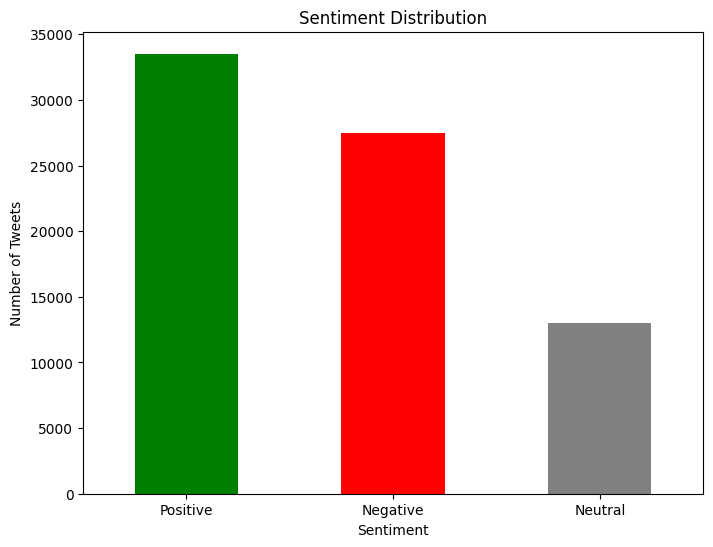

In [212]:
sentiment_counts = df_sentiment['Sentiment'].value_counts()

# Plot the sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

### Interpretation for the bar graph

- **Overall positive sentiment is dominant**, with over 33,500 tweets classified as positive, indicating that people are mostly sharing favorable opinions or feelings about the topic or entity being discussed.

- **Negative sentiment follows** ,with about 27,500 tweets This suggests that while there are some critical or unfavorable opinions, they are not the dominant sentiment.

- **Neutral sentiment is the least common**, with around 13,000 tweets. This indicates that there are a considerable number of tweets where the sentiment is neither strongly positive nor negative, potentially representing neutral discussions or fact-based statements.


### Step-5 Generate Word Clouds for "Positive" and "Negative" Sentiments

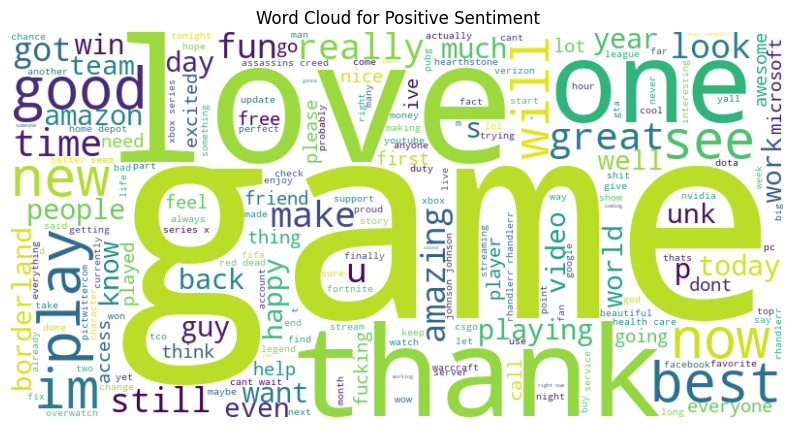

In [213]:

def generate_wordcloud(sentiment_df, sentiment):
    # Combine all text in the selected sentiment group
    text = ' '.join(sentiment_df[sentiment_df['Sentiment'] == sentiment]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment type
generate_wordcloud(df_sentiment, 'Positive')

___
#### ***Observation***
Words such as **good**, **love**, **best**, **thank**, **great**, and **amazing** are prominently observed in the positive sentiment word cloud. This suggests that users are expressing strong appreciation, positive emotions, and gratitude towards the topic or entity. These words indicate a generally favorable and enthusiastic tone in the positive sentiment tweets.
___


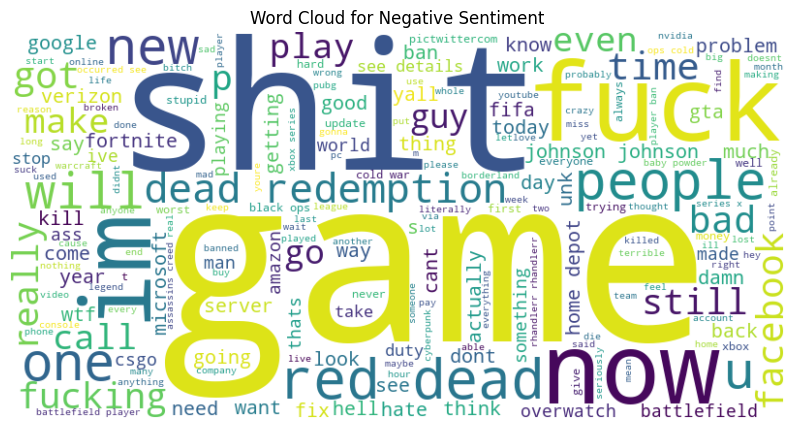

In [214]:
generate_wordcloud(df_sentiment, 'Negative')

___
#### ***Observation***
Words like **shit**, **fuck**, **dead**, **bad**, **hate**, **hard**, **stupid**, and **damn** were observed in the negative sentiment word cloud. These words reflect strong negative emotions, frustration, and dissatisfaction. The presence of such terms suggests that users are expressing criticism, anger, or disapproval towards the topic or entity being discussed.
___
